In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.svm import SVR

In [10]:
df = pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [11]:
zero_columns = ['CUSTODIAL RAPE','PREPARATION AND ASSEMBLY FOR DACOITY','COUNTERFIETING','DOWRY DEATHS','INSULT TO MODESTY OF WOMEN','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES']
df = df.drop(zero_columns, axis = 1)
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,ARSON,HURT/GREVIOUS HURT,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,50,46,30,...,78,16,104,30,1131,149,175,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,23,53,30,...,168,11,65,69,1543,118,154,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,27,59,34,...,156,33,209,38,2088,112,186,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,20,25,20,...,164,12,37,23,795,126,57,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,23,49,26,...,70,50,220,41,1244,109,247,431,2313,6507


In [12]:
df.isnull().sum() #checking for missing values

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                                             0
OTHER THEFT                                            0
RIOTS                          

In [13]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'OTHER RAPE',
       'KIDNAPPING & ABDUCTION', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY', 'ROBBERY', 'BURGLARY',
       'THEFT', 'AUTO THEFT', 'OTHER THEFT', 'RIOTS',
       'CRIMINAL BREACH OF TRUST', 'CHEATING', 'ARSON', 'HURT/GREVIOUS HURT',
       'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'CRUELTY BY HUSBAND OR HIS RELATIVES', 'CAUSING DEATH BY NEGLIGENCE',
       'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [14]:
df['YEAR'].value_counts()

YEAR
2012    811
2011    791
2010    779
2009    767
2008    761
2007    743
2006    740
2005    733
2004    729
2003    728
2002    719
2001    716
Name: count, dtype: int64

In [15]:
states_in_india = df['STATE/UT'].unique()
states_in_india
district = df['DISTRICT'].unique()


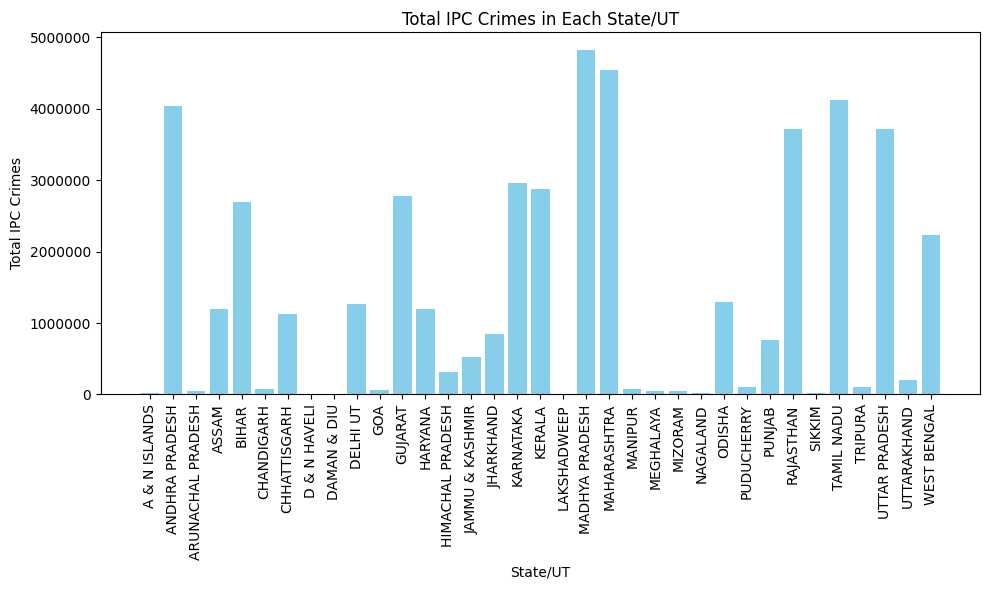

In [16]:
statewise_cirmes = df.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(statewise_cirmes['STATE/UT'], statewise_cirmes['TOTAL IPC CRIMES'], color='skyblue')
plt.xlabel('State/UT')
plt.ylabel('Total IPC Crimes')
plt.title('Total IPC Crimes in Each State/UT')
plt.xticks(rotation=90)
plt.ticklabel_format(axis='y', style='plain')
plt.tight_layout()
plt.show()

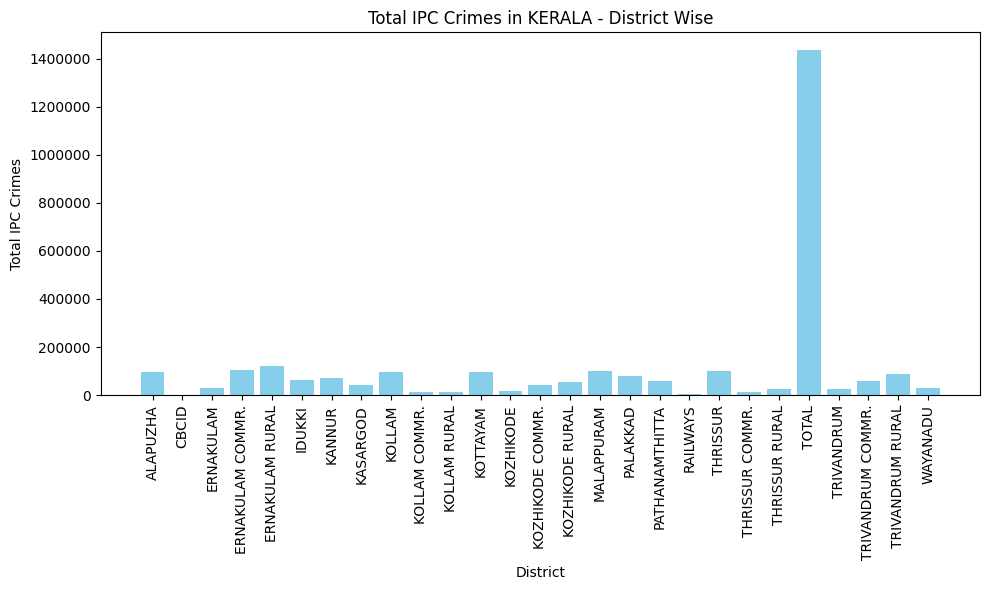

In [17]:
state = "KERALA"
state_data = df[df['STATE/UT'] == state]

districtwise_crimes = state_data.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(districtwise_crimes['DISTRICT'], districtwise_crimes['TOTAL IPC CRIMES'], color='skyblue')
plt.xlabel('District')
plt.ylabel('Total IPC Crimes')
plt.title(f'Total IPC Crimes in {state} - District Wise')
plt.xticks(rotation=90)
plt.ticklabel_format(axis='y', style='plain')
plt.tight_layout()
plt.show()

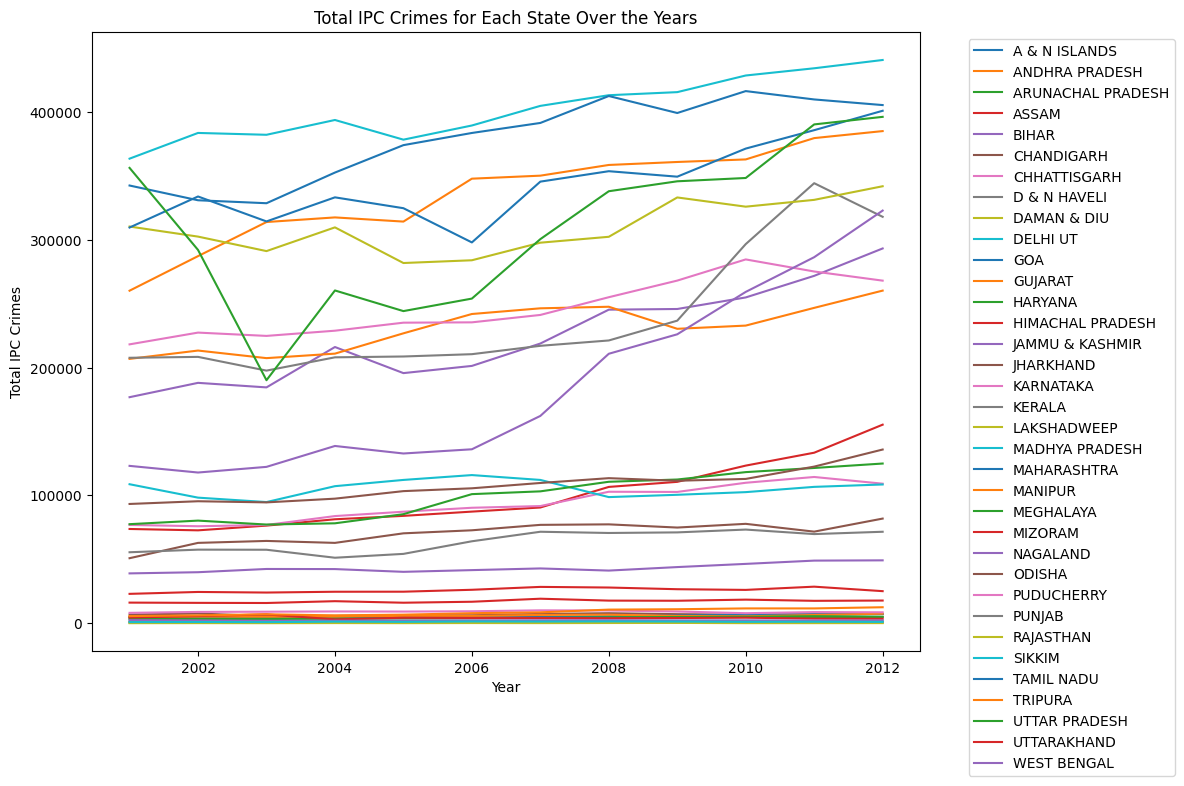

In [18]:
state_yearwise_crimes = df.groupby(['STATE/UT', 'YEAR'])['TOTAL IPC CRIMES'].sum().reset_index()

plt.figure(figsize=(12, 8))

for state in state_yearwise_crimes['STATE/UT'].unique():
    state_data = state_yearwise_crimes[state_yearwise_crimes['STATE/UT'] == state]
    plt.plot(state_data['YEAR'], state_data['TOTAL IPC CRIMES'], label=state)

plt.xlabel('Year')
plt.ylabel('Total IPC Crimes')
plt.title('Total IPC Crimes for Each State Over the Years')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

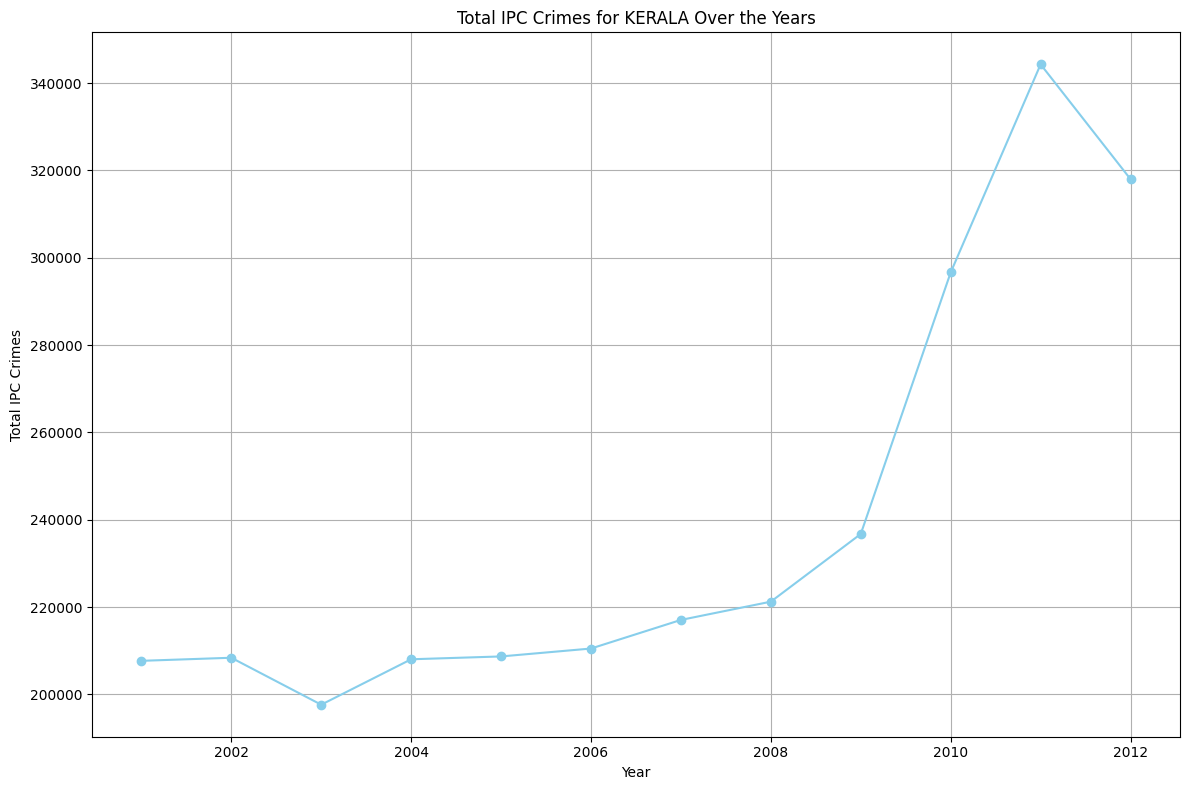

In [19]:
state = "KERALA"

state_data = df[df['STATE/UT'] == state]

state_yearwise_crimes = state_data.groupby('YEAR')['TOTAL IPC CRIMES'].sum().reset_index()

plt.figure(figsize=(12, 8))
plt.plot(state_yearwise_crimes['YEAR'], state_yearwise_crimes['TOTAL IPC CRIMES'], marker='o', color='skyblue', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total IPC Crimes')
plt.title(f'Total IPC Crimes for {state} Over the Years')
plt.grid(True)
plt.tight_layout()
plt.show()

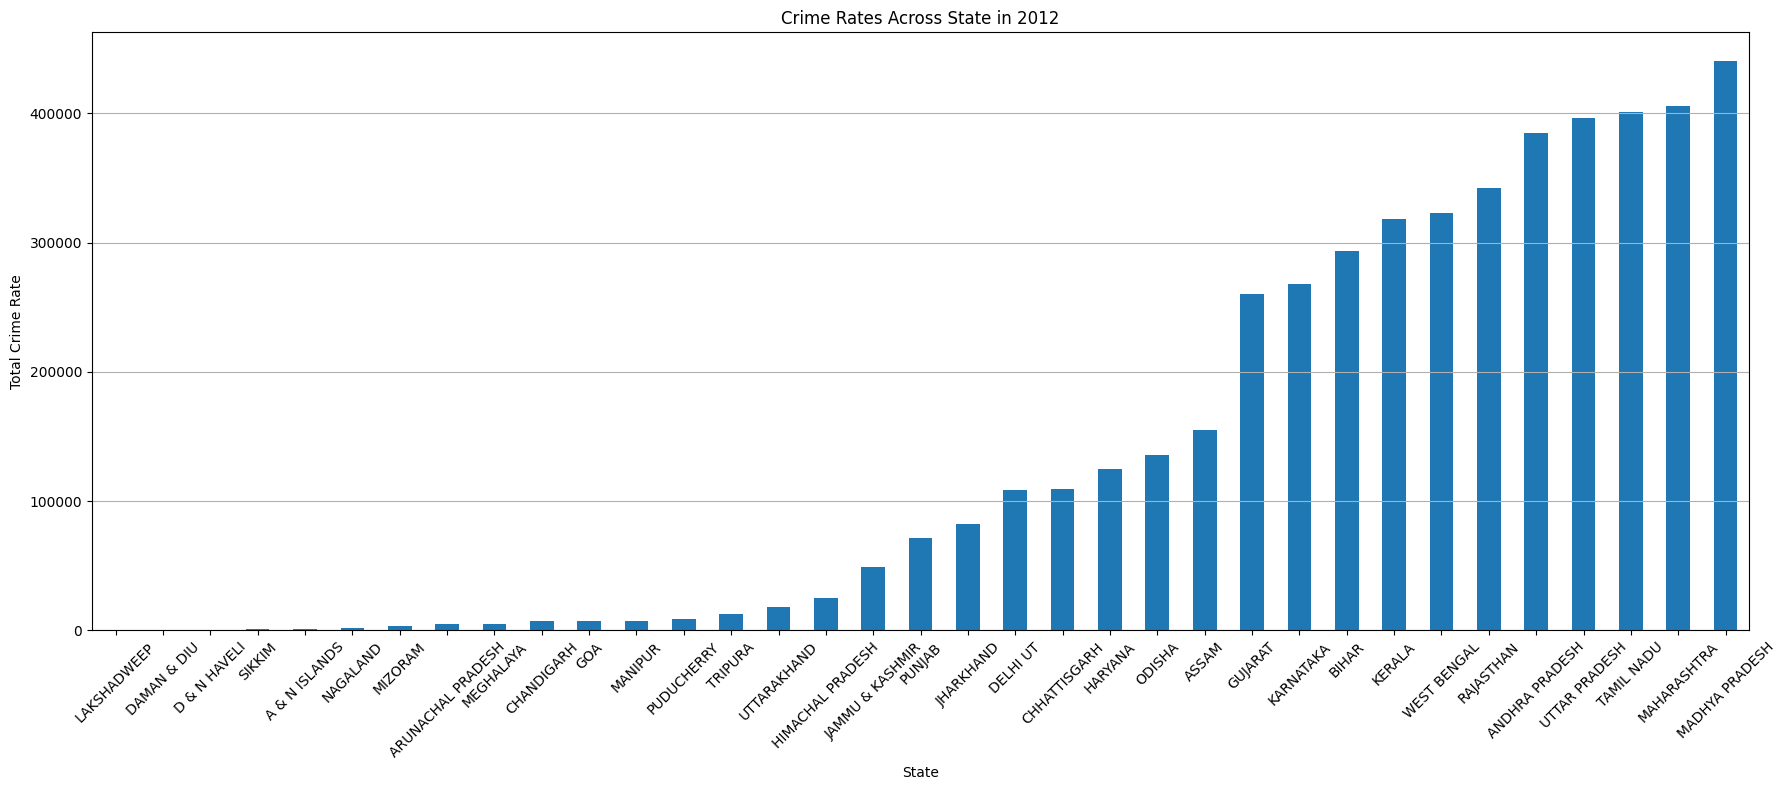

In [20]:
year_to_compare = 2012

data_for_year = df[df['YEAR'] == year_to_compare]

state_crime_rates = data_for_year.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum().sort_values()

plt.figure(figsize=(18, 8))
state_crime_rates.plot(kind='bar')
plt.title(f'Crime Rates Across State in {year_to_compare}')
plt.xlabel('State')
plt.ylabel('Total Crime Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

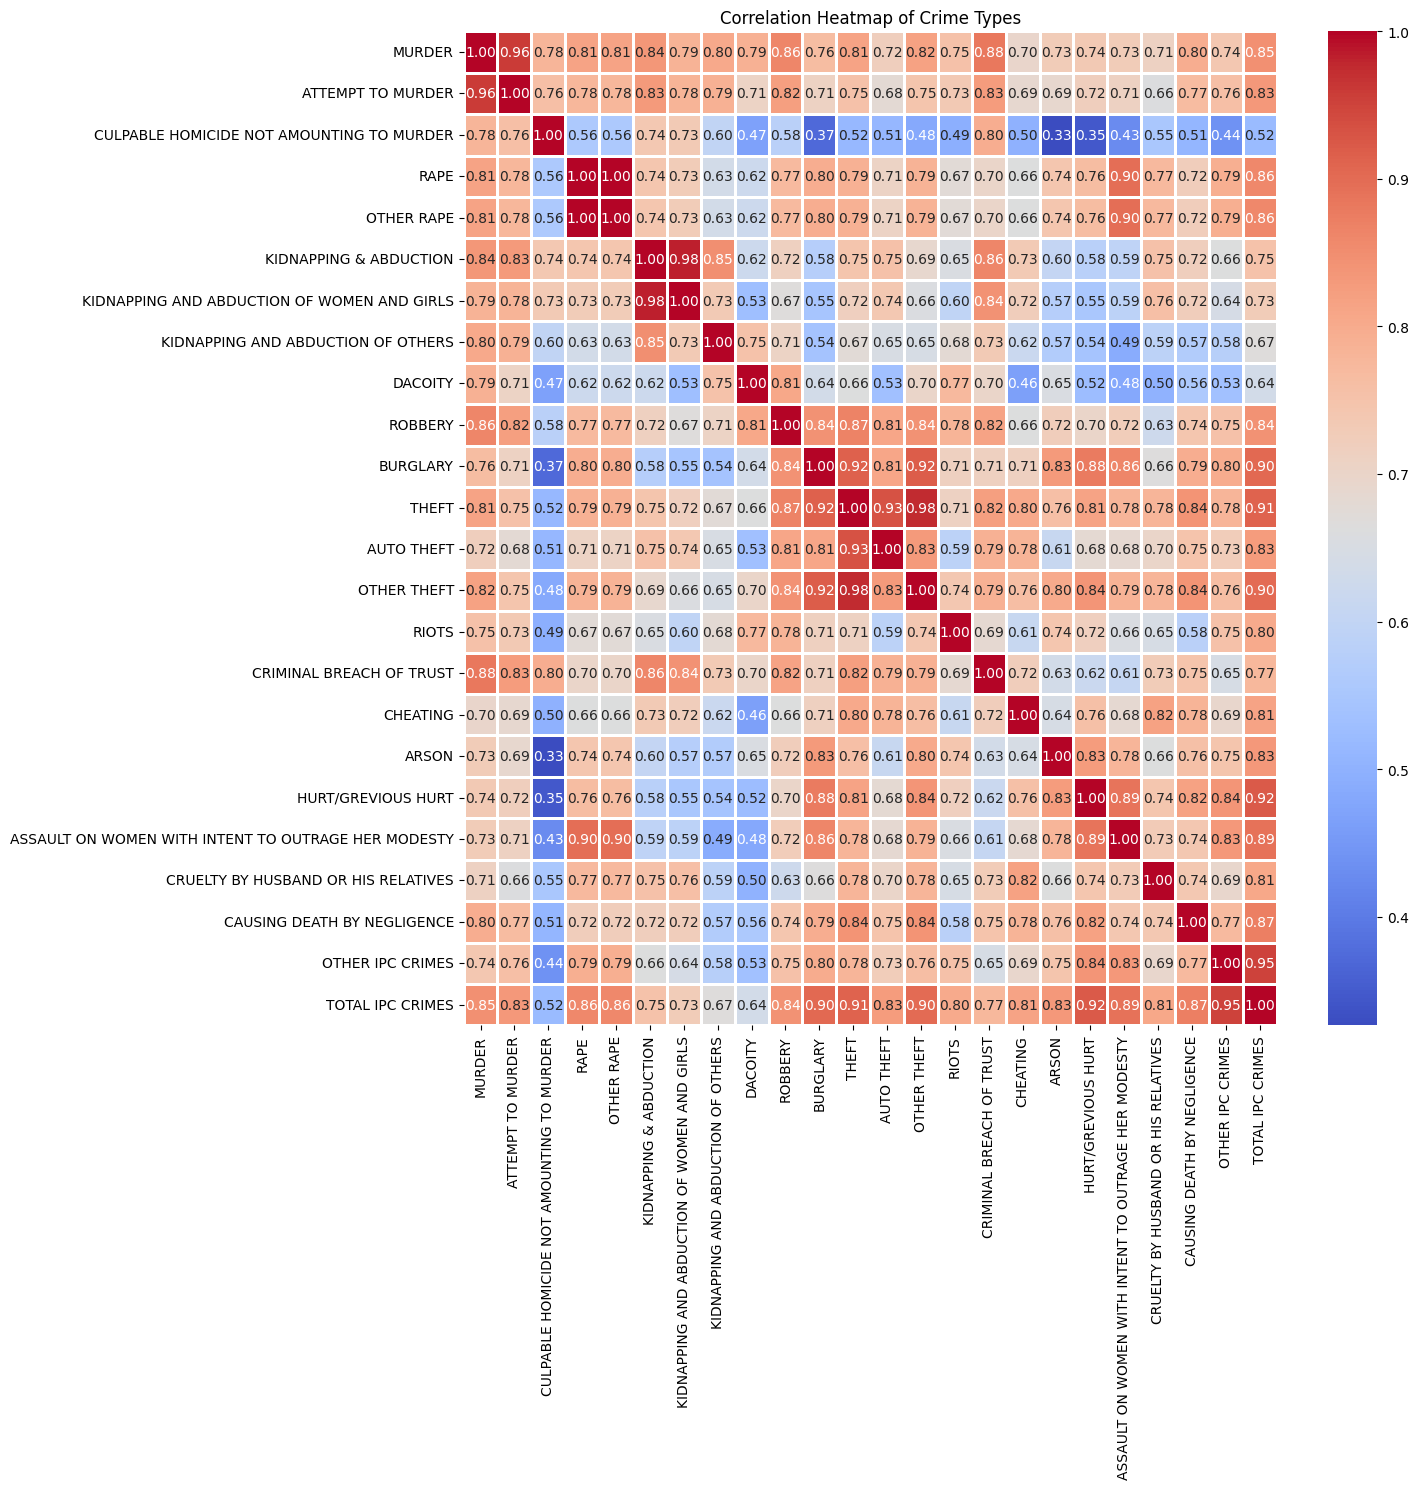

In [21]:
plt.figure(figsize=(15, 15))
correlation_matrix = df.iloc[:, 3:28].corr()
sns.heatmap(correlation_matrix, annot=True,fmt='.2f',linewidths=.8, cmap='coolwarm')
plt.title('Correlation Heatmap of Crime Types')
plt.tight_layout()
plt.show()

In [22]:
X = df[['STATE/UT', 'DISTRICT', 'YEAR']]
y = df['MURDER']

y = y.apply(pd.to_numeric, errors='coerce')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat_district', OneHotEncoder(handle_unknown='ignore'), ['DISTRICT']),
        ('cat_state', OneHotEncoder(handle_unknown='ignore'), ['STATE/UT'])
    ],
    remainder='passthrough'
)

linear_reg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_reg_model.fit(X_train, y_train)

linear_reg_predictions = linear_reg_model.predict(X_test)

linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)

# input_data = pd.DataFrame({
#         "STATE/UT": ['KERALA'],
#         'DISTRICT': ['ALAPUZHA'], 
#         'YEAR': [2014]
#     })

# model.predict(input_data)


In [23]:
# joblib.dump(model, 'crime.pk1')

In [24]:
from sklearn.ensemble import RandomForestRegressor


X = df[['STATE/UT', 'DISTRICT', 'YEAR']]    
y = df['MURDER']

y = y.apply(pd.to_numeric, errors='coerce')    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat_district', OneHotEncoder(handle_unknown='ignore'), ['DISTRICT']),
        ('cat_state', OneHotEncoder(handle_unknown='ignore'), ['STATE/UT'])
    ],
    remainder='passthrough'
)

random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=20,max_depth=None, min_samples_split=2, n_jobs=-1, random_state=42))  
])

random_forest_model.fit(X_train, y_train)

random_forest_predictions = random_forest_model.predict(X_test)

random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

# input_data = pd.DataFrame({
#                 "STATE/UT": ['KERALA'],
#                 'DISTRICT': ['ALAPUZHA'], 
#                 'YEAR': ['2014']
#             })
# model.predict(input_data)
print(random_forest_mse)
from sklearn.metrics import r2_score, mean_absolute_error

# Calculate R-squared score
r_squared_rf = r2_score(y_test, random_forest_predictions)

# Calculate Mean Absolute Error
mae_rf = mean_absolute_error(y_test, random_forest_predictions)

print("Random Forest R-squared score:", r_squared_rf)
print("Random Forest Mean Absolute Error:", mae_rf)



925.4382427937919
Random Forest R-squared score: 0.9909310286893024
Random Forest Mean Absolute Error: 10.86219512195122


Linear Regression Mean Squared Error: 14219.17537417501
Random Forest Mean Squared Error: 925.4382427937919
Linear Regression Cross-Validation RMSE: 161.2759342196514
Random Forest Cross-Validation RMSE: 33.731694516937644


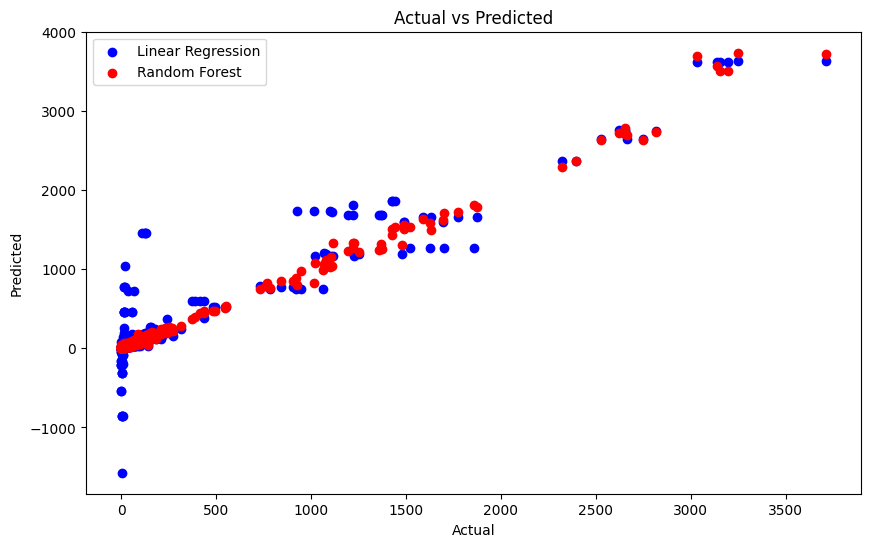

In [25]:

from sklearn.model_selection import cross_val_score

print("Linear Regression Mean Squared Error:", linear_reg_mse)
print("Random Forest Mean Squared Error:", random_forest_mse)


linear_reg_cv_scores = cross_val_score(linear_reg_model, X, y, cv=5, scoring='neg_mean_squared_error')
linear_reg_cv_rmse_scores = (-linear_reg_cv_scores) ** 0.5 
print("Linear Regression Cross-Validation RMSE:", linear_reg_cv_rmse_scores.mean())


random_forest_cv_scores = cross_val_score(random_forest_model, X, y, cv=5, scoring='neg_mean_squared_error')
random_forest_cv_rmse_scores = (-random_forest_cv_scores) ** 0.5  
print("Random Forest Cross-Validation RMSE:", random_forest_cv_rmse_scores.mean())


plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_reg_predictions, color='blue', label='Linear Regression')
plt.scatter(y_test, random_forest_predictions, color='red', label='Random Forest')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [26]:
X = df[['STATE/UT', 'DISTRICT', 'YEAR']]
y = df['MURDER'].values

# y = y.apply(pd.to_numeric, errors='coerce')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat_district', OneHotEncoder(handle_unknown='ignore'), ['DISTRICT']),
        ('cat_state', OneHotEncoder(handle_unknown='ignore'), ['STATE/UT']),
        ('num_year', 'passthrough', ['YEAR'])
    ],
    remainder='passthrough'
)

linear_reg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_reg_model.fit(X_train, y_train)

linear_reg_predictions = linear_reg_model.predict(X_test)

linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
# print(linear_reg_mse)
from sklearn.metrics import r2_score

# Calculate R-squared score
r_squared = r2_score(y_test, linear_reg_predictions)
print("R-squared score:", r_squared)


R-squared score: 0.8606570513653338
